In [9]:
#Импортируем библиотеки и файл
import numpy as np
from matplotlib.pyplot import pie, axis, show 
import numpy as np
import pandas as pd
import re
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show 
import glob

from datetime import date
df = pd.read_csv('C:\\Users\\Edyfa\\Desktop\\dev\\datasets\\MS.csv')


In [ ]:
# Гипотезы:
# 1- Чаще всего нарушают люди в возрасте 20-25 лет
# 2- Самое частое нарушение - превышение скорости
# 3- Чаще всего нарушения происходят в пятницу
# 4- Мужчины нарушают ПДД чаще,чем женщины 
# 5- Наибольшее число нарушений летом
# 6- Люди со знаком зодиака телец, нарушают чаще остальных

In [194]:
df

,stop_date,county_name,gender,birth,age,race,violation,day_number,day_name,month_number,month_name,season,driver_month_birth,driver_birthday,driver_birth_year
0,2013-01-01,Jones County,M,1950-06-14,62.0,Black,Seat belt not used properly as required,2,Tuesday,1,January,Winter,june,14.0,1950.0
1,2013-01-01,Lauderdale County,M,1967-04-06,45.0,Black,Careless driving,2,Tuesday,1,January,Winter,april,6.0,1967.0
2,2013-01-01,Pike County,M,1974-04-15,38.0,Black,Speeding - Regulated or posted speed limit and...,2,Tuesday,1,January,Winter,april,15.0,1974.0
3,2013-01-01,Hancock County,M,1981-03-23,31.0,White,Speeding - Regulated or posted speed limit and...,2,Tuesday,1,January,Winter,march,23.0,1981.0
4,2013-01-01,Holmes County,M,1992-08-03,20.0,White,Speeding - Regulated or posted speed limit and...,2,Tuesday,1,January,Winter,august,3.0,1992.0
5,2013-01-01,Jackson County,F,1960-05-02,52.0,White,Speeding - Regulated or posted speed limit and...,2,Tuesday,1,January,Winter,may,2.0,1960.0
6,2013-01-01,Jackson County,F,1953-03-16,59.0,White,Speeding - Regulated or posted speed limit and...,2,Tuesday,1,January,Winter,march,16.0,1953.0
7,2013-01-01,Grenada County,F,1993-06-14,19.0,White,Speeding - Regulated or posted speed limit and...,2,Tuesday,1,January,Winter,june,14.0,1993.0
8,2013-01-01,Holmes County,M,1947-12-11,65.0,White,Speeding - Regulated or posted speed limit and...,2,Tuesday,1,January,Winter,december,11.0,1947.0
9,2013-01-01,Holmes County,M,1984-07-14,28.0,White,Speeding - Regulated or posted speed limit and...,2,Tuesday,1,January,Winter,july,14.0,1984.0


In [10]:
# Дропаем лишние данные
df.drop(['officer_id','police_department','county_fips','location_raw','state','id','driver_race','violation','stop_time','fine_grained_location','fine_grained_location','search_conducted','search_type_raw','search_type','contraband_found','stop_outcome','is_arrested'], axis=1, inplace=True)



In [135]:
# Производим предварительный анализ данных 

print(df.head (5)) # первые 5 строк
print('____________________________________________________________________________________________________')
print(df.tail(5)) # последние 5 строк
print('____________________________________________________________________________________________________')
print(df.describe())# общие статистические данные
print('____________________________________________________________________________________________________')
print(df.dtypes) # типы данных
print('____________________________________________________________________________________________________')
print(df.shape) # кол-во строк/колонок

   stop_date        county_name gender       birth   age   race  \
0 2013-01-01       Jones County      M  1950-06-14  62.0  Black   
1 2013-01-01  Lauderdale County      M  1967-04-06  45.0  Black   
2 2013-01-01        Pike County      M  1974-04-15  38.0  Black   
3 2013-01-01     Hancock County      M  1981-03-23  31.0  White   
4 2013-01-01      Holmes County      M  1992-08-03  20.0  White   

                                           violation  day_number day_name  \
0            Seat belt not used properly as required           2  Tuesday   
1                                   Careless driving           2  Tuesday   
2  Speeding - Regulated or posted speed limit and...           2  Tuesday   
3  Speeding - Regulated or posted speed limit and...           2  Tuesday   
4  Speeding - Regulated or posted speed limit and...           2  Tuesday   

   month_number month_name  season  driver_month_birth  driver_birthday  
0             1    January  Winter                 6.0      

In [11]:
# Для удобства переименуем колонки
df.rename(index=str, columns={"driver_gender": "gender", "driver_age_raw": "birth", 'driver_race_raw': 'race', 'violation_raw':'violation', 'driver_age': 'age' }, inplace=True)



In [155]:
# Добавляем новые колонки с информацией, которую мы можем получить из начальных данных

df["stop_date"]= pd.to_datetime(df["stop_date"]) # Начнем с даты, сперва преобразуем ее формат

df['day_number'] = df['stop_date'] # Создаем доп колонку, для анализа нарушений по дням недели

df['day_number']=df['day_number'].dt.dayofweek # Выделим из нашей даты - день недели
df['day_number'].replace([0,1,2,3,4,5,6],[1,2,3,4,5,6,7],inplace=True) # номер дня недели

df['day_name']= df['day_number'] # Преобразуем номер дня недели в  имя дня недели
df['day_name'].replace([1,2,3,4,5,6,7],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

df['month_number']=df['stop_date'].dt.month # выделим из даты номер месяца
df['month_name']=df['month_number'] # Порядковый номер месяца
df['month_name'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'],inplace=True) # название месяца

df['season']=df['month_name'] # Добавим колонку с сезонами
df['season'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'],['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Autumn','Autumn','Autumn','Winter'],inplace=True)

df['driver_month_birth'] = df['birth'] # Добавим колонку с месяцем рождения водителя
df['driver_month_birth']= pd.to_datetime(df['driver_month_birth'])
df['driver_month_birth']=df['driver_month_birth'].dt.month

df['driver_birthday'] = df['birth']# Добавим колонку с днем рождения
df['driver_birthday']=pd.to_datetime(df['driver_birthday'])
df['driver_birthday']=df['driver_birthday'].dt.day

df['driver_birth_year']=df['birth'] # Добавим колонку с годом рождения
df['driver_birth_year']=pd.to_datetime(df['driver_birth_year'])
df['driver_birth_year']=df['driver_birth_year'].dt.year

df['driver_month_birth'].replace([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0],['january','february','march','april','may','june','july','august','september','october','november','december'],inplace=True)

White                   112522
Black                    98661
Other                     3361
American Indian            559
Asian/Pacific Island       173
Name: race, dtype: int64


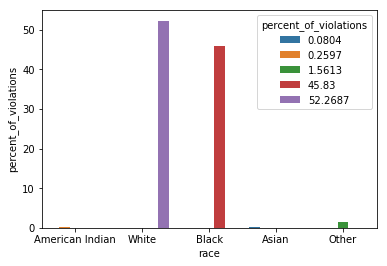

In [13]:
# Кол-во упоминаний каждого(или топа значений) значения в столбцах сета

print(df['race'].value_counts()) # разделение кол-ва нарушений по расе человека

df_race_v = pd.DataFrame({
    'race': [ 'American Indian','White', 'Black','Asian','Other'],
    'percent_of_violations': [0.2597, 52.2687, 45.8300, 0.0804, 1.5613]})

sns.barplot(x='race', y='percent_of_violations', hue= 'percent_of_violations', data=df_race_v)



21.0    9527
22.0    9174
23.0    8913
20.0    8656
24.0    8314
Name: age, dtype: int64


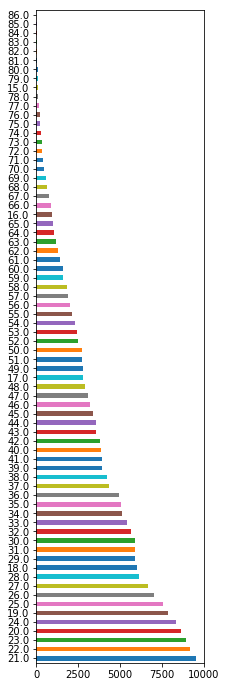

In [14]:
print(df['age'].value_counts().head(5)) # топ 5 возрастов нарушителей
age_value=df['age'].value_counts() 

age_value.plot.barh(figsize=(3, 12))

# Гипотеза №1 подтвердилась

Speeding - Regulated or posted speed limit and actual speed    128150
Failure to maintain required liability insurance                23491
Seat belt not used properly as required                         20458
Name: violation, dtype: int64


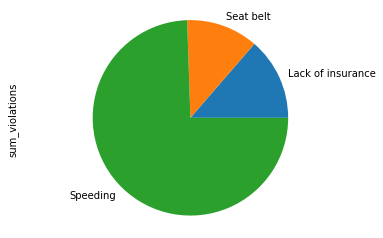

In [15]:
print(df['violation'].value_counts().head(3)) # топ 3 совершаемых нарушений
df_top_violation_name_v = pd.DataFrame({
    'Violation': [ 'Speeding','Lack of insurance', 'Seat belt'],
    'sum_violations': [128150, 23491, 20458]})
df_top_violation_name_v
df_top_violation_name_v.sum_violations.groupby(df_top_violation_name_v.Violation).sum().plot(kind='pie')
plt.axis('equal')
plt.show()
# Гипотеза №2 подтвердилась

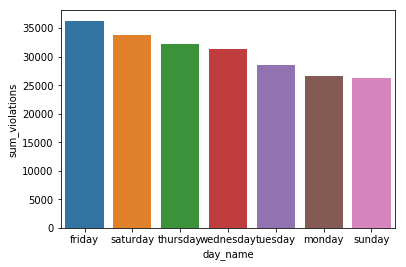

In [22]:
df['day_name'].value_counts() # Определяем по каким дням наибольшее число нарушений 
df_day_name=pd.DataFrame({
    'day_name': [ 'friday','saturday','thursday','wednesday','tuesday','monday','sunday'],
    'sum_violations': [36305,33869,32237,31422,28471,26704,26296]})
sns.barplot(x='day_name', y='sum_violations',  data=df_day_name)
# Гипотеза №3 подтвердилась

In [ ]:
print(df['gender'].value_counts()) # разделение кол-ва нарушений по полу водителя
gender_v = pd.DataFrame({
    'gender': [ 'male','female'],
    'sum_violations': [125452, 89824]})

gender_v.sum_violations.groupby(gender_v.gender).sum().plot(kind='pie')
plt.axis('equal')
plt.show()
#Гипотеза №4 подтвердилась

Spring    62497
Winter    53720
Summer    52637
Autumn    46450
Name: season, dtype: int64


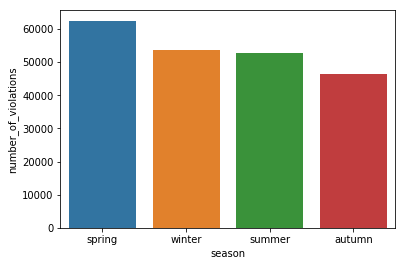

In [196]:
print(df['season'].value_counts()) # Посмотрим на распределение нарушений по сезонам
df_race_gender = pd.DataFrame({
    'season': [ 'spring','winter','summer','autumn'],
    'number_of_violations': [62497,53720,52637,46450]})

sns.barplot(x='season', y='number_of_violations',data=df_race_gender)
# Гипотеза №5 ошибочна

  month_name  number_of_violations
0        may                 21833
1      march                 20724
2    january                 20069


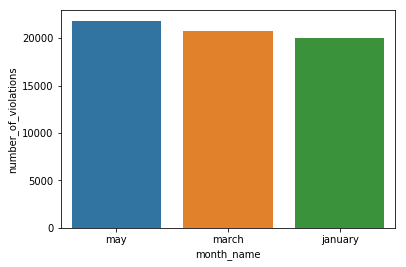

In [92]:
df['month_name'].value_counts() # зная сезон, который лидирует по кол-ву нарушений, найдем месяц с наибольшим числом нарушений
df_month_name_v = pd.DataFrame({
    'month_name': [ 'may','march','january',],
    'number_of_violations': [21833,20724,20069]})

print(df_month_name_v)
sns.barplot(x='month_name', y='number_of_violations',data=df_month_name_v)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


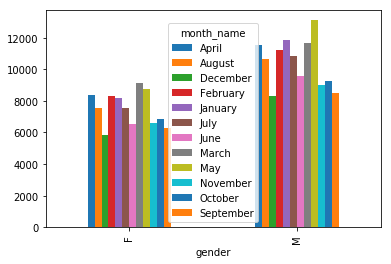

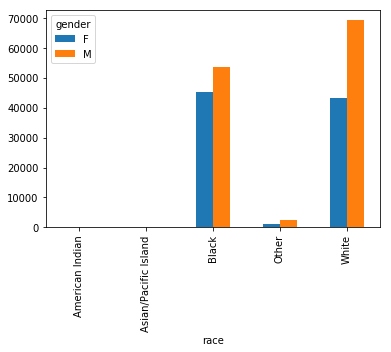

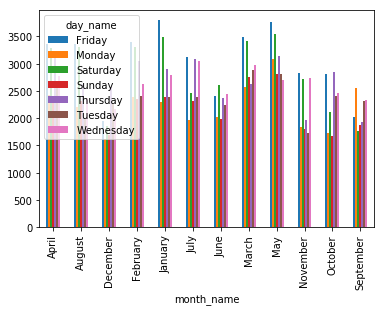

In [73]:

df.groupby(['gender','month_name', 'day_name'])['age'].mean() 
print(pd.crosstab(df['gender'], df['month_name']).plot(kind='bar'))#Нарушения разных полов по месяцам
print(pd.crosstab(df['race'], df['gender']).plot(kind='bar'))#Нарушения по расам и полу
print(pd.crosstab(df['month_name'], df['day_name']).plot(kind='bar'))# День с наибольшим числом нарушений для каждого месяца


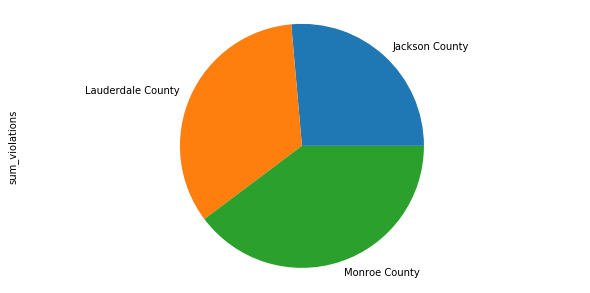

In [69]:
# Определяем район с наибольшим показателем нарушений
df_top3_county = pd.DataFrame({
    'county_name': [ 'Monroe County','Lauderdale County', 'Jackson County'],
    'sum_violations': [10593, 9021, 7035 ]})

df_top3_county.sum_violations.groupby(df_top3_county.county_name).sum().plot(kind='pie',figsize=(10, 5))
plt.axis('equal')
plt.show()

In [193]:

day = df['driver_birthday']
month = df['driver_month_birth']
if month == 'december':
    astro_sign = 'Sagittarius' if (day < 22) else 'capricorn'
elif month == 'january':
    astro_sign = 'Capricorn' if (day < 20) else 'aquarius'
elif month == 'february':
    astro_sign = 'Aquarius' if (day < 19) else 'pisces'
elif month == 'march':
    astro_sign = 'Pisces' if (day < 21) else 'aries'
elif month == 'april':
    astro_sign = 'Aries' if (day < 20) else 'taurus'
elif month == 'may':
    astro_sign = 'Taurus' if (day < 21) else 'gemini'
elif month == 'june':
    astro_sign = 'Gemini' if (day < 21) else 'cancer'
elif month == 'july':
    astro_sign = 'Cancer' if (day < 23) else 'leo'
elif month == 'august':
    astro_sign = 'Leo' if (day < 23) else 'virgo'
elif month == 'september':
    astro_sign = 'Virgo' if (day < 23) else 'libra'
elif month == 'october':
    astro_sign = 'Libra' if (day < 23) else 'scorpio'
elif month == 'november':
    astro_sign = 'scorpio' if (day < 22) else 'sagittarius'
print(astro_sign)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df['driver_month_birth'] = df['birth'] # Добавим колонку с месяцем рождения водителя
df['driver_month_birth']= pd.to_datetime(df['driver_month_birth'])
df['driver_month_birth']=df['driver_month_birth'].dt.month

df['driver_birthday'] = df['birth']# Добавим колонку с днем рождения
df['driver_birthday']=pd.to_datetime(df['driver_birthday'])
df['driver_birthday']=df['driver_birthday'].dt.day

df['driver_birth_year']=df['birth'] # Добавим колонку с годом рождения
df['driver_birth_year']=pd.to_datetime(df['driver_birth_year'])
df['driver_birth_year']=df['driver_birth_year'].dt.year

       month  number_of_peopels
0     august              19975
1  september              19768
2       july              19294
3   december              18979
4    october              18497


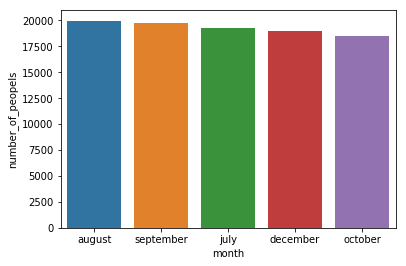

In [189]:
driver_month=df['driver_month_birth'].value_counts().head(5) # Топ месяцев рождения
driver_month = pd.DataFrame({
    'month': [ 'august','september', 'july','december','october'],
    'number_of_peopels': [19975, 19768, 19294, 18979, 18497]})


print(driver_month)
sns.barplot(x='month', y='number_of_peopels',data=driver_month)
